In [9]:
# HYPER PARAMETERS

PAST_DATA_START = "1978"
PAST_DATA_END = "1983"

CURRENT_DATA_START = "2016"
CURRENT_DATA_END = "2021"

In [88]:
import arch
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from arch.unitroot import PhillipsPerron
import pandas as pd
import numpy as np
import statsmodels.api as sm


data = pd.read_csv("dataset.csv", index_col = 0, parse_dates = True)
data.columns = ['Inflation', 'Unemployment', 'Inflation_Expectations']

past_data = data[PAST_DATA_START: PAST_DATA_END]
current_data = data[CURRENT_DATA_START: CURRENT_DATA_END]


In [89]:
data

,Inflation,Unemployment,Inflation_Expectations
DATE,,,
1978-01-01,6.81431,6.4,5.2
1978-02-01,6.23946,6.3,6.4
1978-03-01,6.37584,6.3,6.3
1978-04-01,6.50000,6.1,6.7
1978-05-01,7.14286,6.0,6.9
...,...,...,...
2021-08-01,5.20248,5.2,4.6
2021-09-01,5.37730,4.7,4.6
2021-10-01,6.24352,4.6,4.8


In [90]:
def pp_test(series: pd.Series) -> None:

    pp = PhillipsPerron(series)
    print(f" \n {series.name}")
    print(pp.summary().as_text())

In [91]:
data.apply(pp_test)

 
 Inflation
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.308
P-value                         0.169
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Unemployment
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.266
P-value                         0.016
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Inflation_Expectations
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.697
P-value                         0.075
Lags                               19
-------------------------------------

Trend: Constant


Inflation                 None
Unemployment              None
Inflation_Expectations    None
dtype: object

In [92]:
past_data.apply(pp_test)

 
 Inflation
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.776
P-value                         0.826
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.53 (1%), -2.90 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Unemployment
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.127
P-value                         0.704
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.53 (1%), -2.90 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Inflation_Expectations
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.153
P-value                         0.693
Lags                               12
-------------------------------------

Trend: Constant


Inflation                 None
Unemployment              None
Inflation_Expectations    None
dtype: object

In [93]:
current_data.apply(pp_test)

 
 Inflation
     Phillips-Perron Test (Z-tau)    
Test Statistic                  0.440
P-value                         0.983
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.53 (1%), -2.90 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Unemployment
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.653
P-value                         0.083
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.53 (1%), -2.90 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Inflation_Expectations
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.369
P-value                         0.915
Lags                               12
-------------------------------------

Trend: Constant


Inflation                 None
Unemployment              None
Inflation_Expectations    None
dtype: object

In [94]:
data.diff().dropna().apply(pp_test)

 
 Inflation
     Phillips-Perron Test (Z-tau)    
Test Statistic                -13.505
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Unemployment
     Phillips-Perron Test (Z-tau)    
Test Statistic                -22.543
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Inflation_Expectations
     Phillips-Perron Test (Z-tau)    
Test Statistic                -30.414
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant


Inflation                 None
Unemployment              None
Inflation_Expectations    None
dtype: object

In [103]:
def plot_philips(data):

  dates = [x.timestamp() for x in data.index]
  plt.figure(figsize=(10, 8))
  plt.grid(True)
  plt.scatter(data['Unemployment'].values, data['Inflation'].values,
              c=dates, cmap='coolwarm', s=110, alpha=0.5)
  _ = plt.ylabel('Inflation Rate')
  _ = plt.xlabel('Unemployment Rate')
  plt.title('Scatterplot of Inflation against Unemployment')
  cbar = plt.colorbar()
  cbar.set_label('Date')
  plt.show()


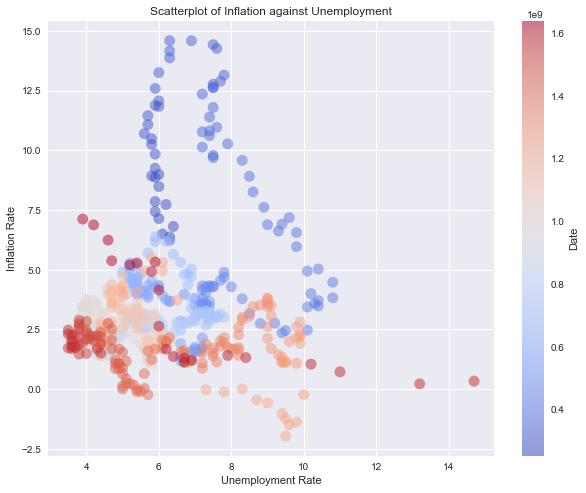

In [104]:
plot_philips(data)

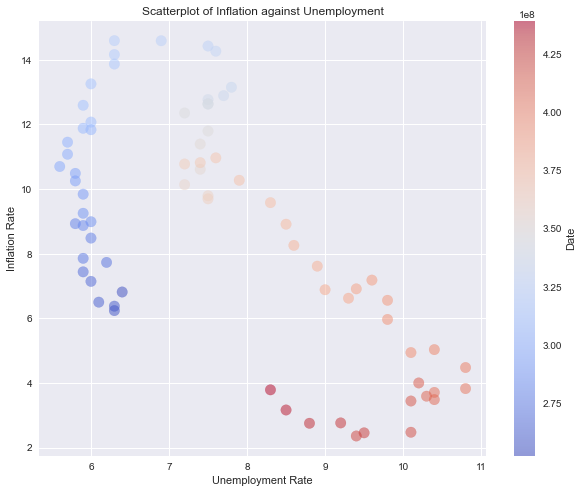

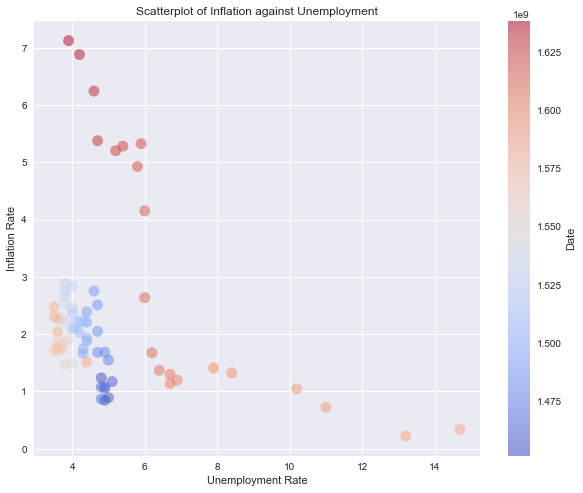

In [105]:
plot_philips(past_data)
plot_philips(current_data)

In [106]:
from statsmodels.tsa.stattools import coint as cointtest

In [107]:
cointtest(data.iloc[:, 0], data.iloc[:, 1])

(-3.047569519593225,
 0.09932647135765599,
 array([-3.91734231, -3.34774868, -3.05250761]))

In [108]:
cointtest(past_data.iloc[:, 0], past_data.iloc[:, 1])

(-1.88007636853562,
 0.5900766761798694,
 array([-4.05734298, -3.42354125, -3.10472479]))

In [109]:
cointtest(current_data.iloc[:, 0], current_data.iloc[:, 1])

(-0.08113883505311789,
 0.9838269645508344,
 array([-4.05734298, -3.42354125, -3.10472479]))

<AxesSubplot:ylabel='Frequency'>

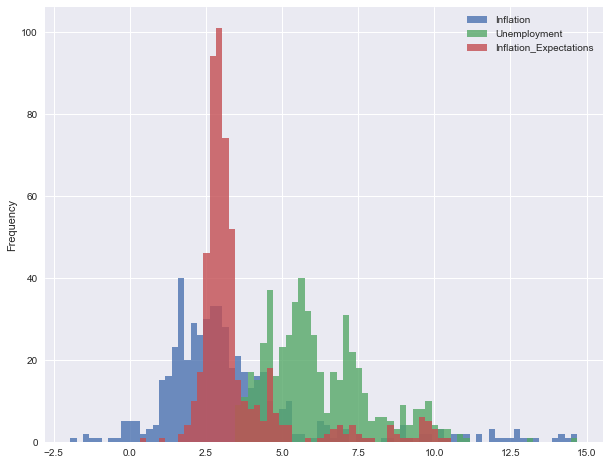

In [110]:
data.plot(kind='hist', figsize = (10, 8), alpha=0.8, bins=80)

In [112]:
import seaborn as sns

past_data['Time Period'] = 'Past'
current_data['Time Period'] = 'Present'
grouped_data = pd.concat([past_data, current_data], axis=0)
grouped_data['Time Period'] = grouped_data['Time Period'].astype('category')

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


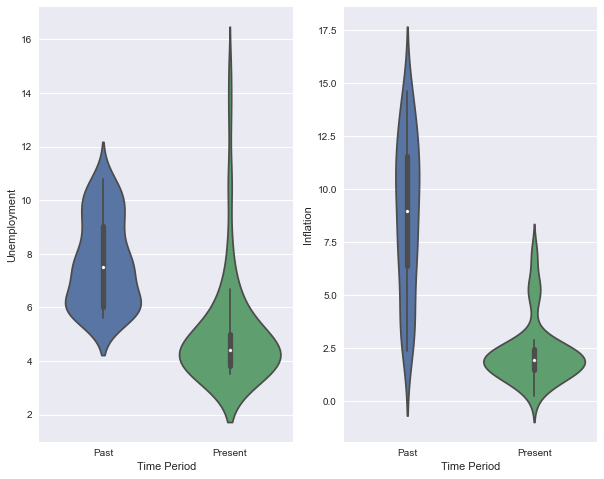

In [120]:
fig, ax = plt.subplots(ncols = 2, figsize = (10, 8))

sns.violinplot(data = grouped_data, y='Unemployment', x = 'Time Period', ax=ax[0])
sns.violinplot(data = grouped_data, y='Inflation', x = 'Time Period', ax=ax[1])
plt.show()

<AxesSubplot:xlabel='DATE'>

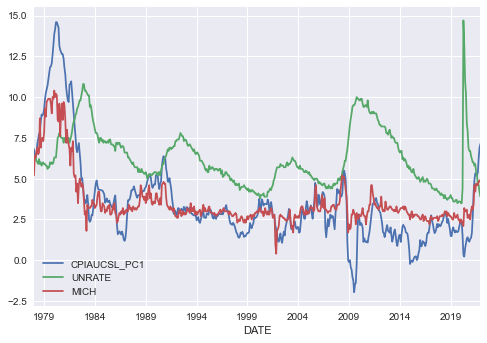